## **Mounting the google drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Exploratory Data Analysis - AML_Synthetic_Deaths_Dataset**
## **Fetching the Data**

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the first dataset (AML Synthetic Deaths Dataset)
aml_deaths_df = pd.read_csv("/content/drive/MyDrive/Case Studies/Results/AML_Synthetic_Deaths_Dataset.csv")

# Show basic information and first few rows
aml_deaths_df.head()

,Patient_ID,Age,Gender,Cause_of_Death_Late_Diagnosis,Cause_of_Death_Bleeding,Cause_of_Death_Relapse
0,AML_00001,26,Male,1,0,0
1,AML_00002,23,Female,0,0,1
2,AML_00003,32,Male,1,0,0
3,AML_00004,34,Female,1,0,0
4,AML_00005,30,Male,0,0,1


## **Age Distribution of AML Paitents**

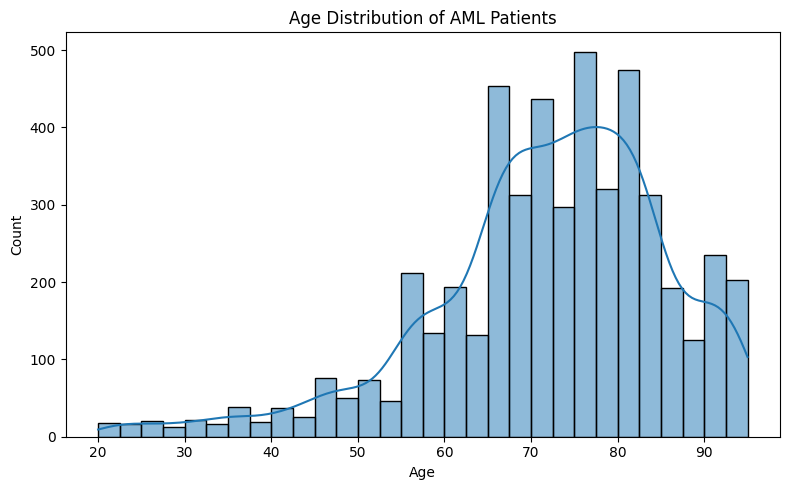

In [4]:
# Plot 1: Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(aml_deaths_df['Age'], bins=30, kde=True)
plt.title('Age Distribution of AML Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## **Gender Distribution of AML Patients**

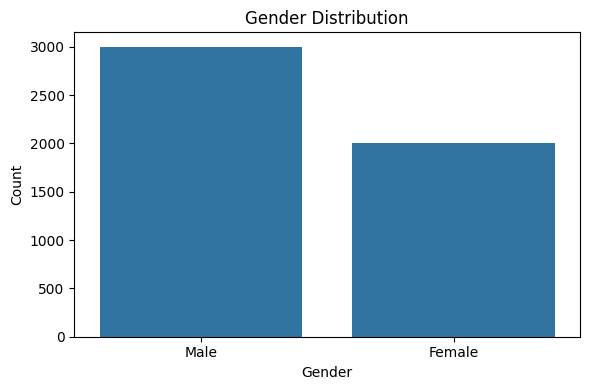

In [5]:
# Plot 2: Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=aml_deaths_df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## **Cause of Death Distribution**

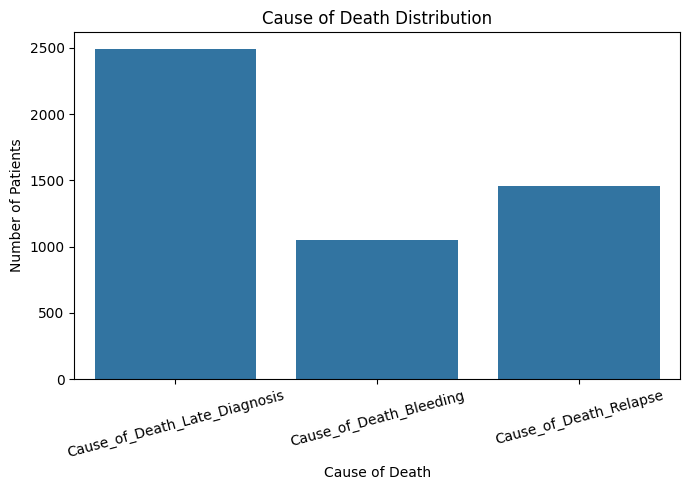

In [6]:
# Plot 3: Cause of Death Distribution
cause_cols = ['Cause_of_Death_Late_Diagnosis', 'Cause_of_Death_Bleeding', 'Cause_of_Death_Relapse']
cause_sums = aml_deaths_df[cause_cols].sum()

plt.figure(figsize=(7, 5))
sns.barplot(x=cause_sums.index, y=cause_sums.values)
plt.title('Cause of Death Distribution')
plt.ylabel('Number of Patients')
plt.xlabel('Cause of Death')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

## **Age Distribution vs Cause of Death Distribution**

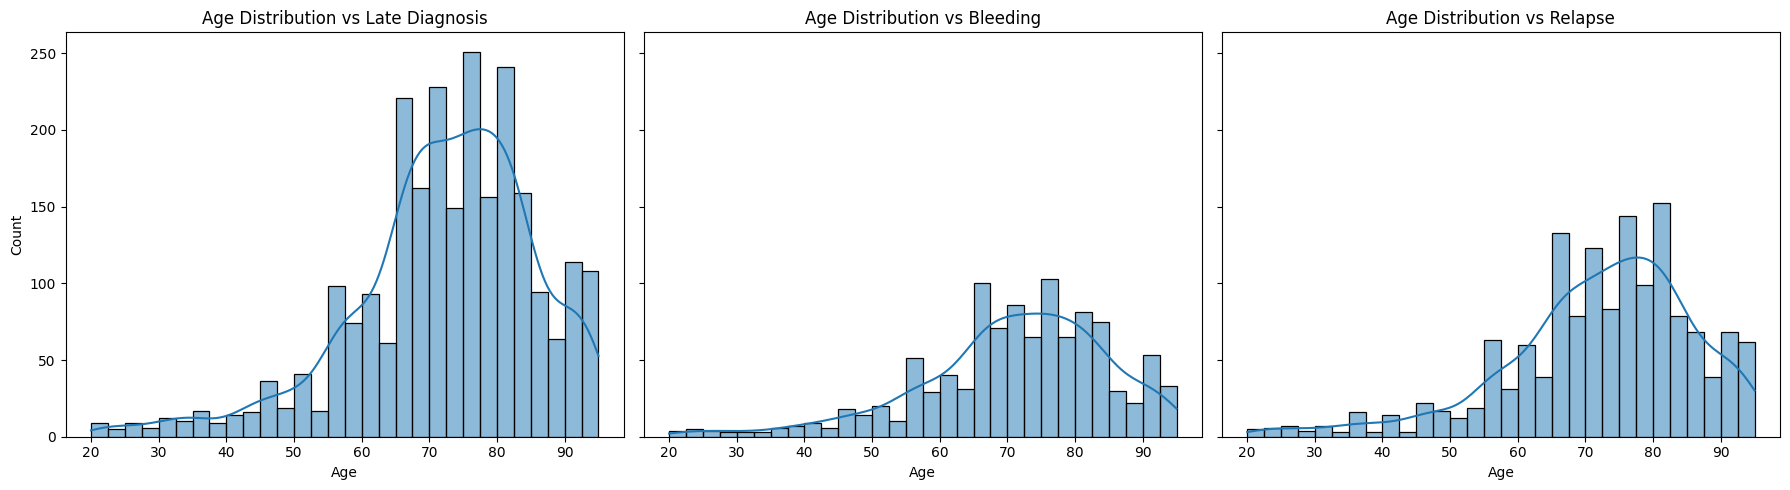

In [7]:
# Create separate age distribution plots for each cause of death
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

cause_names = {
    'Cause_of_Death_Late_Diagnosis': 'Late Diagnosis',
    'Cause_of_Death_Bleeding': 'Bleeding',
    'Cause_of_Death_Relapse': 'Relapse'
}

for ax, cause_col in zip(axes, cause_names):
    subset = aml_deaths_df[aml_deaths_df[cause_col] == 1]
    sns.histplot(subset['Age'], bins=30, kde=True, ax=ax)
    ax.set_title(f'Age Distribution vs {cause_names[cause_col]}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


## **Gender Distribution vs Cause of Death Distribution**

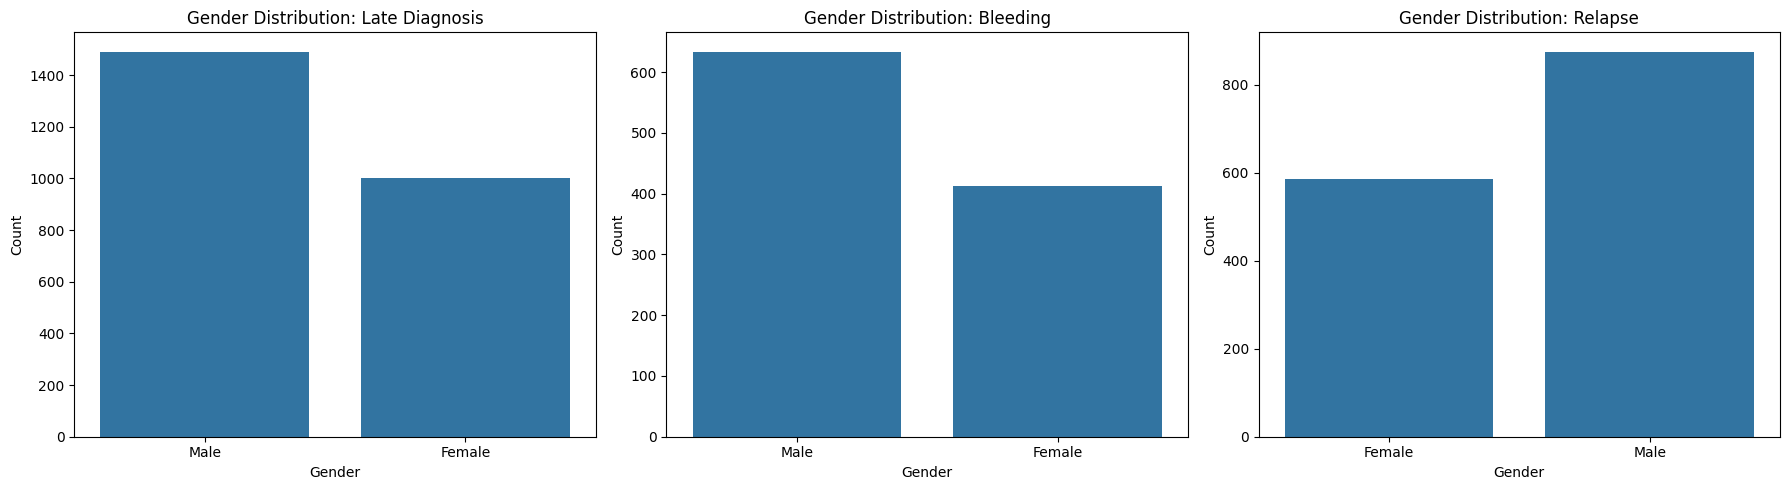

In [8]:
# Count plot of gender vs each cause of death
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, cause_col in zip(axes, cause_names):
    sns.countplot(data=aml_deaths_df[aml_deaths_df[cause_col] == 1], x='Gender', ax=ax)
    ax.set_title(f'Gender Distribution: {cause_names[cause_col]}')
    ax.set_xlabel('Gender')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


## **Correlation Matrix**

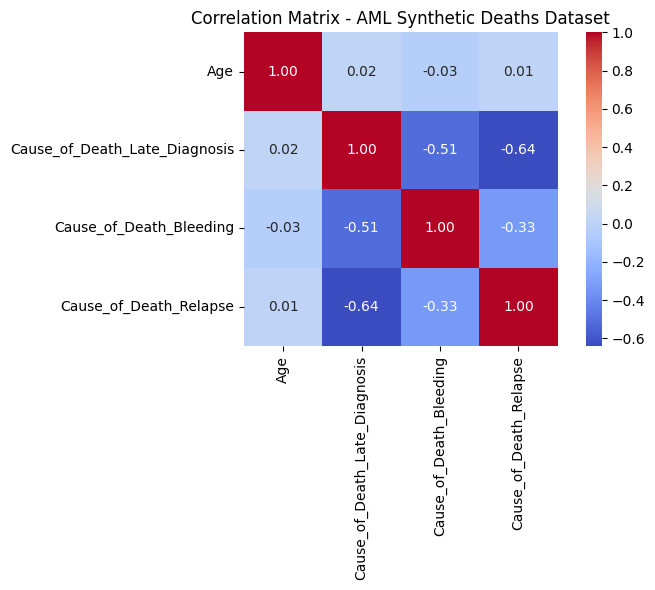

,Age,Cause_of_Death_Late_Diagnosis,Cause_of_Death_Bleeding,Cause_of_Death_Relapse
Age,1.000000,0.018518,-0.032829,0.009013
Cause_of_Death_Late_Diagnosis,0.018518,1.000000,-0.513209,-0.640411
Cause_of_Death_Bleeding,-0.032829,-0.513209,1.000000,-0.330510
Cause_of_Death_Relapse,0.009013,-0.640411,-0.330510,1.000000


In [9]:
# Re-import necessary libraries after code execution state reset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Re-load the AML Synthetic Deaths Dataset
aml_deaths_df = pd.read_csv("/content/drive/MyDrive/Case Studies/Results/AML_Synthetic_Deaths_Dataset.csv")


# Compute correlation matrix for numeric columns only
correlation_matrix = aml_deaths_df.drop(columns=['Patient_ID', 'Gender']).corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix - AML Synthetic Deaths Dataset")
plt.tight_layout()
plt.show()

correlation_matrix


## **Hypothesis Testing**
## **Age Differences Across Causes of Death**

####  Does patients age distributions have a significant different across the three causes of death?

### **Null Hypothesis**
#### There is no significant difference between a patients age and the causes of death.

### **Alternative Hypothesis**
#### There is atleast one significant difference in a patients age and the causes of death.

In [10]:
# Extract age groups based on each cause of death
age_late_diag = aml_deaths_df[aml_deaths_df['Cause_of_Death_Late_Diagnosis'] == 1]['Age']
age_bleeding = aml_deaths_df[aml_deaths_df['Cause_of_Death_Bleeding'] == 1]['Age']
age_relapse = aml_deaths_df[aml_deaths_df['Cause_of_Death_Relapse'] == 1]['Age']

# Perform one-way ANOVA test
from scipy.stats import f_oneway

anova_result = f_oneway(age_late_diag, age_bleeding, age_relapse)

# Show result
{
    "ANOVA Test - Age across Causes of Death": {
        "F-statistic": float(anova_result.statistic),
        "p-value": float(anova_result.pvalue)
    }
}


{'ANOVA Test - Age across Causes of Death': {'F-statistic': 2.7050514936593455,
  'p-value': 0.06696479734620647}}

* #### Since we are comparing three independent groups(categorical variable) such as Late Diagnosis, Bleeding, Relapse against the patients age(continuous variable), we are using ANOVA Test.

* #### After completing the ANOVA testing we got p-value greater then 0.05 which indicates we fail to reject the null hypothesis.

* #### This means that there is no significant difference in the paitents age and the causes of death.

* #### But we cannot proceed with this comparison since we focus more on th mortality rate

## **Gender Differences Across Causes of Death**

### **Null Hypothesis**
#### There is no significant difference between gender and the causes of deaths.

### **Alternative Hypothesis**
#### There is atleast one difference in the gender and the causes of death.

In [11]:
# Convert gender to numeric for ANOVA (Male = 0, Female = 1)
aml_deaths_df['Gender_Numeric'] = aml_deaths_df['Gender'].map({'Male': 0, 'Female': 1})

# Gender groups for each cause of death
gender_late_diag = aml_deaths_df[aml_deaths_df['Cause_of_Death_Late_Diagnosis'] == 1]['Gender_Numeric']
gender_bleeding = aml_deaths_df[aml_deaths_df['Cause_of_Death_Bleeding'] == 1]['Gender_Numeric']
gender_relapse = aml_deaths_df[aml_deaths_df['Cause_of_Death_Relapse'] == 1]['Gender_Numeric']

# ANOVA test for gender vs cause of death
anova_gender_result = f_oneway(gender_late_diag, gender_bleeding, gender_relapse)

# Display results
{
    "ANOVA Test - Gender across Causes of Death": {
        "F-statistic": float(anova_gender_result.statistic),
        "p-value": float(anova_gender_result.pvalue)
    }
}


{'ANOVA Test - Gender across Causes of Death': {'F-statistic': 0.08756863087093536,
  'p-value': 0.9161573987866038}}

* #### Since we are comparing three independent groups(categorical variable) such as Late Diagnosis, Bleeding, Relapse against the numerically converted patients gender(numeric dependent variable), we are using ANOVA Test.

* #### After completing the ANOVA testing we got p-value greater then 0.05 which indicates we fail to reject the null hypothesis.

* #### This means that there is no significant difference in the paitents gender and the causes of death.

* #### But we cannot proceed with this comparison since we focus more on th mortality rate

## **Hypothesis Test on Causes of Death**

## **Late Diagnosis vs Bleeding**

### **Null Hypothesis**

#### There is no significant association between deaths due to Late Diagnosis and Bleeding

### **Alternative Hypothesis**

#### There is a significant association between these two causes — they do not occur independently.

In [15]:
from scipy.stats import chi2_contingency

# Run Chi-Square test: Late Diagnosis vs Bleeding
contingency_ld_vs_bleeding = pd.crosstab(
    aml_deaths_df['Cause_of_Death_Late_Diagnosis'],
    aml_deaths_df['Cause_of_Death_Bleeding']
)

chi_ld_bleeding = chi2_contingency(contingency_ld_vs_bleeding)

# Format output
{
    "Hypothesis Test": "Late Diagnosis vs Bleeding",
    "Chi2 Statistic": float(chi_ld_bleeding[0]),
    "p-value": float(chi_ld_bleeding[1]),
    "Conclusion": "Reject Null Hypothesis" if chi_ld_bleeding[1] < 0.05 else "Fail to Reject Null Hypothesis"
}


{'Hypothesis Test': 'Late Diagnosis vs Bleeding',
 'Chi2 Statistic': 1314.3937649911068,
 'p-value': 8.419143973141517e-288,
 'Conclusion': 'Reject Null Hypothesis'}

* #### We have used Chi Squared Test of Independence since we are comparing two categorical variables

* #### After performing the test we identified the p-value is less then 0.05(p-value: $8.42 × 10^{-288}$), which means that there is a high association between the deaths due to Late Diagnosis and Bleeding.

* #### We reject the null hypothesis

## **Late Diagnosis vs Relapse**

### **Null Hypothesis**

#### There is no significant association between deaths due to Late Diagnosis and Relapse.

### **Alternative Hypothesis**

#### There is a significant association between these two causes — they do not occur independently.

In [17]:
# Run Chi-Square test: Late Diagnosis vs Relapse
contingency_ld_vs_relapse = pd.crosstab(
    aml_deaths_df['Cause_of_Death_Late_Diagnosis'],
    aml_deaths_df['Cause_of_Death_Relapse']
)

chi_ld_relapse = chi2_contingency(contingency_ld_vs_relapse)

# Format output
{
    "Hypothesis Test": "Late Diagnosis vs Relapse",
    "Chi2 Statistic": float(chi_ld_relapse[0]),
    "p-value": float(chi_ld_relapse[1]),
    "Conclusion": "Reject Null Hypothesis" if chi_ld_relapse[1] < 0.05 else "Fail to Reject Null Hypothesis"
}


{'Hypothesis Test': 'Late Diagnosis vs Relapse',
 'Chi2 Statistic': 2047.8151104234414,
 'p-value': 0.0,
 'Conclusion': 'Reject Null Hypothesis'}

* #### We have used Chi Squared Test of Independence since we are comparing two categorical variables

* #### After performing the test we identified the p-value is less then 0.05(p-value: 0.0), which means that there is a high association between the deaths due to Late Diagnosis and Relapse.

* #### We reject the null hypothesis

## **Bleeding vs Relapse**

### **Null Hypothesis**
#### There is no significant association between deaths due to Bleeding and Relapse.

### **Alternative Hypothesis**
#### There is a significant association between these two causes — they do not occur independently.

In [22]:
# Run Chi-Square test: Bleeding vs Relapse
contingency_bleeding_vs_relapse = pd.crosstab(
    aml_deaths_df['Cause_of_Death_Bleeding'],
    aml_deaths_df['Cause_of_Death_Relapse']
)

chi_bleeding_relapse = chi2_contingency(contingency_bleeding_vs_relapse)

# Format output
{
    "Hypothesis Test": "Bleeding vs Relapse",
    "Chi2 Statistic": float(chi_bleeding_relapse[0]),
    "p-value": float(chi_bleeding_relapse[1]),
    "Conclusion": "Reject Null Hypothesis" if chi_bleeding_relapse[1] < 0.05 else "Fail to Reject Null Hypothesis"
}


{'Hypothesis Test': 'Bleeding vs Relapse',
 'Chi2 Statistic': 544.3995508864492,
 'p-value': 2.0812613210539276e-120,
 'Conclusion': 'Reject Null Hypothesis'}

* #### We have used Chi Squared Test of Independence since we are comparing two categorical variables

* #### After performing the test we identified the p-value is less then 0.05(p-value: $2.08 × 10^{-120}$), which means that there is a high association between the deaths due to Bleeding and Relapse.

* #### We reject the null hypothesis

## **Summary**

In [18]:
# Summary statistics
summary_stats = aml_deaths_df.describe()
summary_stats

,Age,Cause_of_Death_Late_Diagnosis,Cause_of_Death_Bleeding,Cause_of_Death_Relapse,Gender_Numeric
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,71.846800,0.498600,0.209400,0.292000,0.400000
std,13.845522,0.500048,0.406921,0.454728,0.489947
min,20.000000,0.000000,0.000000,0.000000,0.000000
25%,65.000000,0.000000,0.000000,0.000000,0.000000
50%,74.000000,0.000000,0.000000,0.000000,0.000000
75%,81.000000,1.000000,0.000000,1.000000,1.000000
max,95.000000,1.000000,1.000000,1.000000,1.000000


## **Exploratory Data Analysis - Patient_Info**

##**Fetching the data**

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the first dataset (AML Synthetic Deaths Dataset)
patient_info_df = pd.read_csv("/content/drive/MyDrive/Case Studies/Results/Patient_Info.csv")

# Show basic information and first few rows
patient_info_df.head()

,Patient_ID,Age,Gender,Blood_Tests_in_Last_Year
0,LD_00001,71,Male,2
1,LD_00002,34,Male,2
2,LD_00003,80,Male,2
3,LD_00004,40,Female,3
4,LD_00005,43,Male,0


## **Age Distribution of Patients**

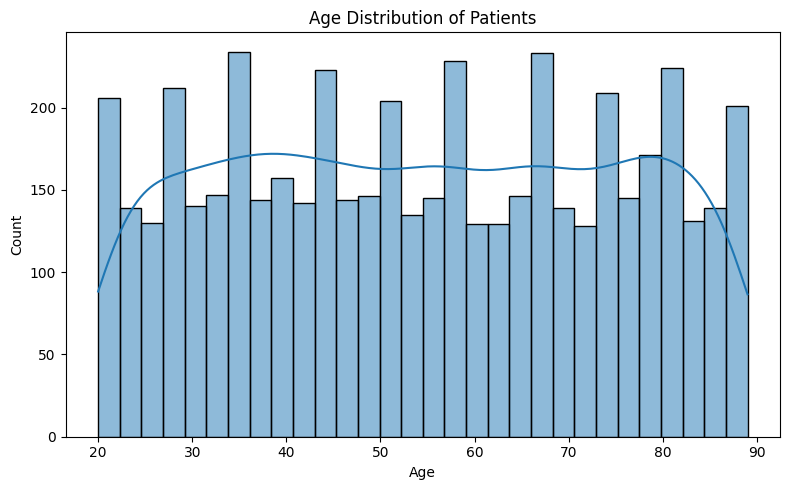

In [20]:
# Plot 1: Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(patient_info_df['Age'], bins=30, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## **Gender Distribution**

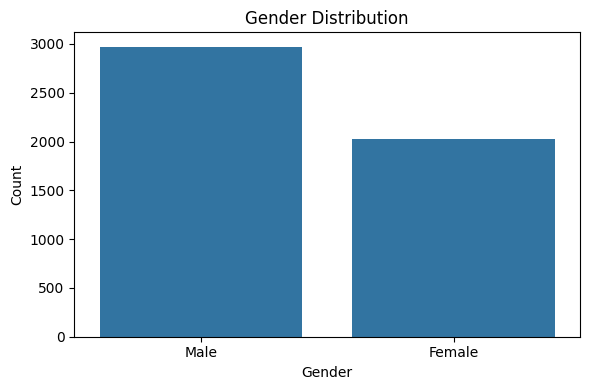

In [21]:
# Plot 2: Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=patient_info_df, x='Gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


## **Blood Tests Frequency Distribution**

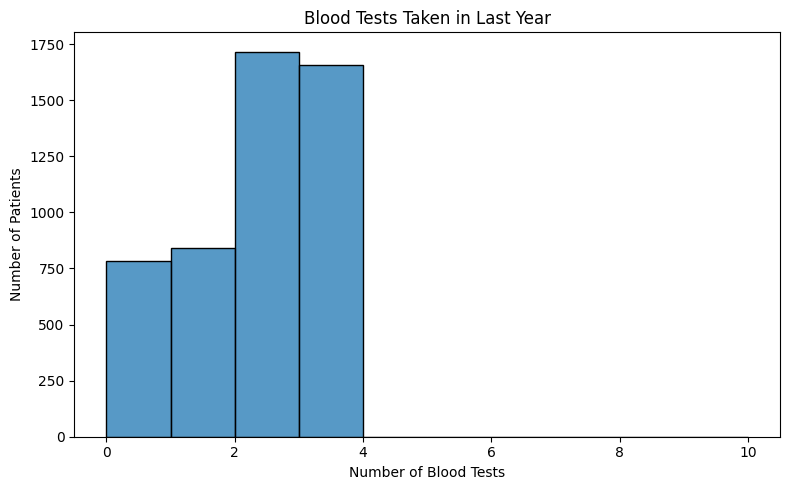

In [23]:
# Plot 3: Blood Tests Frequency Distribution
plt.figure(figsize=(8, 5))
sns.histplot(patient_info_df['Blood_Tests_in_Last_Year'], bins=range(0, 11), kde=False)
plt.title('Blood Tests Taken in Last Year')
plt.xlabel('Number of Blood Tests')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()


In [24]:
# Group-wise analysis: average number of blood tests by gender
grouped_gender = patient_info_df.groupby("Gender")["Blood_Tests_in_Last_Year"].agg(["mean", "median", "count", "std"])
print("Group-wise Blood Test Stats by Gender:")
print(grouped_gender)

# Create age bins
age_bins = [18, 30, 45, 60, 75, 90]
age_labels = ['18-30', '31-45', '46-60', '61-75', '76-90']
patient_info_df['Age_Group'] = pd.cut(patient_info_df['Age'], bins=age_bins, labels=age_labels)

# Group-wise analysis: average number of blood tests by age group
grouped_age = patient_info_df.groupby("Age_Group")["Blood_Tests_in_Last_Year"].agg(["mean", "median", "count", "std"])
print("\nGroup-wise Blood Test Stats by Age Group:")
print(grouped_age)


Group-wise Blood Test Stats by Gender:
            mean  median  count       std
Gender                                   
Female  1.823645     2.0   2030  1.051382
Male    1.868687     2.0   2970  1.050235

Group-wise Blood Test Stats by Age Group:
               mean  median  count       std
Age_Group                                   
18-30      1.504648     2.0    753  1.120549
31-45      1.504014     1.0   1121  1.105276
46-60      1.520188     2.0   1065  1.096738
61-75      2.176190     2.0   1050  0.870228
76-90      2.501484     3.0   1011  0.500245


<ipython-input-24-0804d9de383a>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_age = patient_info_df.groupby("Age_Group")["Blood_Tests_in_Last_Year"].agg(["mean", "median", "count", "std"])


<ipython-input-25-ba142cb0a26a>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=patient_info_df, x='Gender', y='Blood_Tests_in_Last_Year', ci='sd')


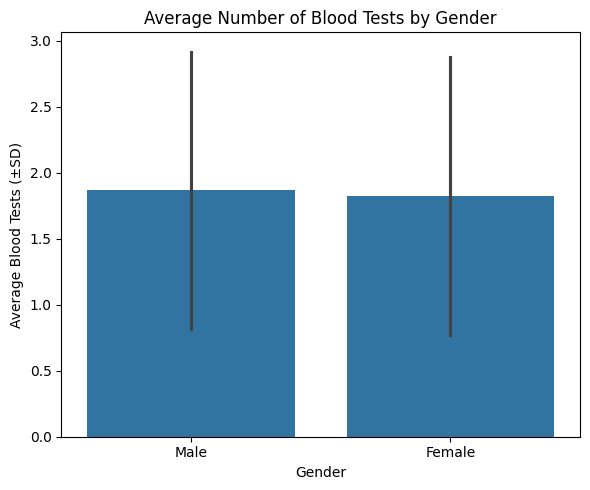

<ipython-input-25-ba142cb0a26a>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=patient_info_df, x='Age_Group', y='Blood_Tests_in_Last_Year', ci='sd')


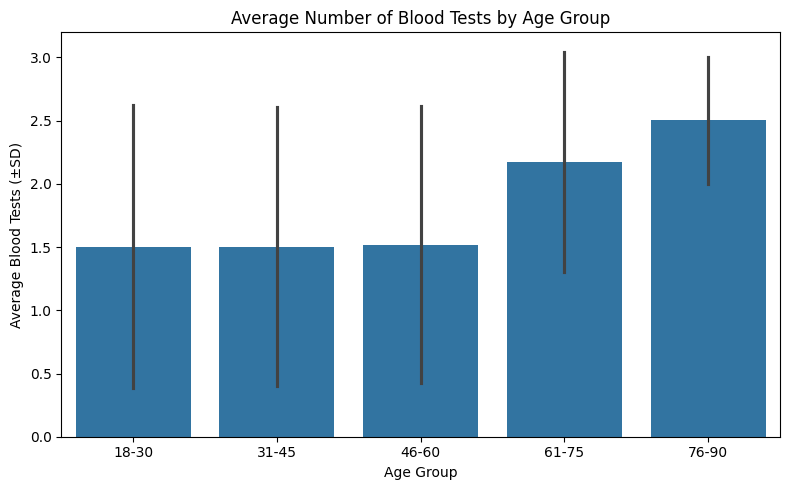

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create age group column
age_bins = [18, 30, 45, 60, 75, 90]
age_labels = ['18-30', '31-45', '46-60', '61-75', '76-90']
patient_info_df['Age_Group'] = pd.cut(patient_info_df['Age'], bins=age_bins, labels=age_labels)

# Plot 1: Average blood tests by gender
plt.figure(figsize=(6, 5))
sns.barplot(data=patient_info_df, x='Gender', y='Blood_Tests_in_Last_Year', ci='sd')
plt.title("Average Number of Blood Tests by Gender")
plt.ylabel("Average Blood Tests (±SD)")
plt.tight_layout()
plt.show()

# Plot 2: Average blood tests by age group
plt.figure(figsize=(8, 5))
sns.barplot(data=patient_info_df, x='Age_Group', y='Blood_Tests_in_Last_Year', ci='sd')
plt.title("Average Number of Blood Tests by Age Group")
plt.ylabel("Average Blood Tests (±SD)")
plt.xlabel("Age Group")
plt.tight_layout()
plt.show()


## **Correlation matrix**

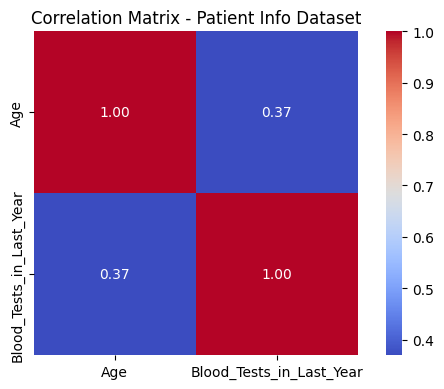

,Age,Blood_Tests_in_Last_Year
Age,1.000000,0.369836
Blood_Tests_in_Last_Year,0.369836,1.000000


In [33]:
# Load the corrected Patient_Info dataset
patient_info_df = pd.read_csv("/content/drive/MyDrive/Case Studies/Results/Patient_Info.csv")

# Drop non-numeric columns (including any age group label columns)
correlation_matrix_patient = patient_info_df.select_dtypes(include='number').corr()

# Plot the correlation heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix_patient, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix - Patient Info Dataset")
plt.tight_layout()
plt.show()

correlation_matrix_patient



## **Hypothesis Test:**
## **Blood Tests Across Age**

### **Null Hypothesis**

#### There is no significant difference between the number of blood tests taken and the age group such as younger and older patients

### **Alternative Hypothesis**
#### There is a signficant difference in blood tests taken and two age groups.

In [27]:
from scipy.stats import ttest_ind

# Create age groups: Younger (<=60) and Older (>60)
patient_info_df['Age_Group_Binary'] = patient_info_df['Age'].apply(lambda x: 'Younger' if x <= 60 else 'Older')

# Split the groups for testing
younger_tests = patient_info_df[patient_info_df['Age_Group_Binary'] == 'Younger']['Blood_Tests_in_Last_Year']
older_tests = patient_info_df[patient_info_df['Age_Group_Binary'] == 'Older']['Blood_Tests_in_Last_Year']

# Run t-test
ttest_age = ttest_ind(younger_tests, older_tests, equal_var=False)

# Display results
{
    "T-Test: Younger vs Older Patients (Blood Tests)": {
        "t-statistic": float(ttest_age.statistic),
        "p-value": float(ttest_age.pvalue)
    }
}


{'T-Test: Younger vs Older Patients (Blood Tests)': {'t-statistic': -31.76976120896722,
  'p-value': 7.322420688133782e-202}}

* #### Here we are using T-Test since we are comparing the means of two independent variables (i.e. Patients aged ≤ 50 and Patients aged > 50)

* #### After running the test we got a p-value less than 0.05 (p-value: $7.32 * 10^{-202}$) and this rejects the null hypothesis

* #### This confirms that Older patients take significantly more datasets then the younger patients

## **Blood Test Across Gender**
### **Null Hypothesis**
#### There is a no significant difference in the number of blood tests between male and female patients

### **Alternative Hypothesis**
#### There is a significant difference in the blood tests and gender.

In [28]:
# Split the groups for testing by gender
male_tests = patient_info_df[patient_info_df['Gender'] == 'Male']['Blood_Tests_in_Last_Year']
female_tests = patient_info_df[patient_info_df['Gender'] == 'Female']['Blood_Tests_in_Last_Year']

# Run t-test
ttest_gender = ttest_ind(male_tests, female_tests, equal_var=False)

# Display results
{
    "T-Test: Male vs Female Patients (Blood Tests)": {
        "t-statistic": float(ttest_gender.statistic),
        "p-value": float(ttest_gender.pvalue)
    }
}


{'T-Test: Male vs Female Patients (Blood Tests)': {'t-statistic': 1.4882858442175853,
  'p-value': 0.13674791681193757}}

* #### Here we are using T-Test since we are comparing the means of two independent variables (i.e. Male and Female)

* #### After running the test we got a p-value greater than 0.05 and this fails to reject the null hypothesis

* #### This means that there is no significant difference in how often a male and female get blood tests.

##**Summary**

In [29]:
# Summary statistics
summary_stats_patient = patient_info_df.describe()
summary_stats_patient

,Age,Blood_Tests_in_Last_Year
count,5000.000000,5000.000000
mean,54.478400,1.850400
std,20.091746,1.050829
min,20.000000,0.000000
25%,37.000000,1.000000
50%,54.000000,2.000000
75%,72.000000,3.000000
max,89.000000,3.000000
